In [1]:
from pathlib import Path

import pandas as pd

from source.utils.dataframes import print_md_table

ucs_df_dir = Path(
    '/share/compling/projects/sanpi/results/assoc_df')
set_dir = ucs_df_dir/'set_diff'/'min15x'/'extra'
mir_dir = ucs_df_dir/'mirror'/'min15x'/'extra'
paths = {
    'mir_bg': mir_dir.joinpath('polarized-bigram_MIRROR.35f-868thresh_min15x.rsort-view_extra.pkl.gz'),
    'set_bg': set_dir.joinpath('polarized-bigram_35f=868+_min15x.rsort-view_extra.pkl.gz'),
    'mir_adv': mir_dir.joinpath('polarized-adv_MIRROR.35f-868thresh_min15x.rsort-view_extra.pkl.gz'),
    'set_adv': set_dir.joinpath('polarized-adv_35f=868+_min15x.rsort-view_extra.pkl.gz'),
}

In [2]:
def select_data(df: pd.DataFrame,
                n_dec: int = 3):

    drop_ranks_obs = r'^[^rO]|^\w$'

    df = df.copy().filter(regex=drop_ranks_obs)
    num_cols = df.select_dtypes('float').columns
    df.loc[:, num_cols] = df.loc[:, num_cols].round(
        n_dec).apply(pd.to_numeric, downcast='float')
    return df

In [3]:
def display_assoc(df: pd.DataFrame,
                  N: int = 30,
                  n_dec: int = 3,
                  sort_columns: list = None):

    col_re_filter = r'ad[vj]|given\d$|prob|(log|odds)_ratio|^l\d|expected_r|^f$'

    if sort_columns is None:
        sort_columns = df.columns.to_series().filter(
            items=['am_p1_given2',
                   'conservative_log_ratio',
                   'adv_total',
                   'adj_total']).to_list()
    n_df = df.nlargest(N, columns=sort_columns).filter(regex=col_re_filter)
    print_md_table(
        n_df, title=f'**Top {N} associations**\n_by `{"` > `".join(sort_columns)}`_\n', n_dec=n_dec)
    return n_df

In [14]:
def show_data(df_path:Path):
    _df = pd.read_pickle(df_path)
    _df = select_data(_df)
    return _df, display_assoc(_df)
    

## Strongest Bigram-Polarity Associations 

### Mirror Dataset Bigram Associations

In [15]:
mir_bg, mir_bg_top = show_data(paths['mir_bg'])

**Top 30 associations**
_by `am_p1_given2` > `conservative_log_ratio` > `adv_total` > `adj_total`_

| key                      | l1       | l2                   |   f |   am_odds_ratio_disc |   am_p1_given2 |   am_p2_given1 |   log_ratio |   conservative_log_ratio | adv          | adj             |   adv_total |   adj_total |
|:-------------------------|:---------|:---------------------|----:|---------------------:|---------------:|---------------:|------------:|-------------------------:|:-------------|:----------------|------------:|------------:|
| NEG-ever_simple          | NEGATIVE | ever_simple          | 207 |                3.387 |          0.855 |          0.001 |      20.213 |                    6.081 | ever         | simple          |   5,050.000 |  27,767.000 |
| NEG-ever_enough          | NEGATIVE | ever_enough          | 147 |                3.239 |          0.855 |          0.001 |      19.719 |                    5.562 | ever         | enough          |   5,050.000 |  1

**Top 30 associations**
_by `am_p1_given2` > `conservative_log_ratio` > `adv_total` > `adj_total`_

| key                      | l1       | l2                   |       f |   am_odds_ratio_disc |   am_p1_given2 |   am_p2_given1 |   log_ratio |   conservative_log_ratio | adv          | adj             |   adv_total |   adj_total |
|:-------------------------|:---------|:---------------------|--------:|---------------------:|---------------:|---------------:|------------:|-------------------------:|:-------------|:----------------|------------:|------------:|
| NEG-ever_simple          | NEGATIVE | ever_simple          | 207.000 |                3.387 |          0.855 |          0.001 |      20.213 |                    6.081 | ever         | simple          |   5,050.000 |  27,767.000 |
| NEG-ever_enough          | NEGATIVE | ever_enough          | 147.000 |                3.239 |          0.855 |          0.001 |      19.719 |                    5.562 | ever         | enough          |   5,050.000 |  10,176.000 |
| NEG-ever_certain         | NEGATIVE | ever_certain         | 143.000 |                3.227 |          0.855 |          0.001 |      19.679 |                    5.520 | ever         | certain         |   5,050.000 |   2,116.000 |
| NEG-entirely_certain     | NEGATIVE | entirely_certain     |  62.000 |                2.866 |          0.854 |          0.000 |      18.473 |                    4.197 | entirely     | certain         |  11,491.000 |   2,116.000 |
| NEG-ever_black           | NEGATIVE | ever_black           |  56.000 |                2.822 |          0.854 |          0.000 |      18.327 |                    4.028 | ever         | black           |   5,050.000 |   1,704.000 |
| NEG-ever_happy           | NEGATIVE | ever_happy           |  48.000 |                2.755 |          0.854 |          0.000 |      18.104 |                    3.766 | ever         | happy           |   5,050.000 |  15,693.000 |
| NEG-ever_sick            | NEGATIVE | ever_sick            |  39.000 |                2.666 |          0.854 |          0.000 |      17.805 |                    3.403 | ever         | sick            |   5,050.000 |   2,201.000 |
| NEG-there_much           | NEGATIVE | there_much           |  39.000 |                2.666 |          0.854 |          0.000 |      17.805 |                    3.403 | there        | much            |     319.000 |   8,014.000 |
| NEG-ever_alone           | NEGATIVE | ever_alone           |  38.000 |                2.655 |          0.854 |          0.000 |      17.767 |                    3.357 | ever         | alone           |   5,050.000 |     824.000 |
| NEG-ever_dull            | NEGATIVE | ever_dull            |  37.000 |                2.644 |          0.854 |          0.000 |      17.729 |                    3.309 | ever         | dull            |   5,050.000 |     739.000 |
| NEG-ever_straightforward | NEGATIVE | ever_straightforward |  32.000 |                2.582 |          0.854 |          0.000 |      17.519 |                    3.042 | ever         | straightforward |   5,050.000 |   1,634.000 |
| NEG-ever_final           | NEGATIVE | ever_final           |  32.000 |                2.582 |          0.854 |          0.000 |      17.519 |                    3.042 | ever         | final           |   5,050.000 |     224.000 |
| NEG-ever_sure            | NEGATIVE | ever_sure            |  30.000 |                2.554 |          0.854 |          0.000 |      17.426 |                    2.921 | ever         | sure            |   5,050.000 |  11,285.000 |
| NEG-truly_sure           | NEGATIVE | truly_sure           |  28.000 |                2.525 |          0.854 |          0.000 |      17.327 |                    2.789 | truly        | sure            |  14,216.000 |  11,285.000 |
| NEG-ever_successful      | NEGATIVE | ever_successful      |  28.000 |                2.525 |          0.854 |          0.000 |      17.327 |                    2.789 | ever         | successful      |   5,050.000 |   5,646.000 |
| NEG-more_untrue          | NEGATIVE | more_untrue          |  26.000 |                2.493 |          0.854 |          0.000 |      17.220 |                    2.644 | more         | untrue          | 312,473.969 |     420.000 |
| NEG-particularly_fast    | NEGATIVE | particularly_fast    |  26.000 |                2.493 |          0.854 |          0.000 |      17.220 |                    2.644 | particularly | fast            |  14,612.000 |   1,459.000 |
| NEG-ever_impossible      | NEGATIVE | ever_impossible      |  25.000 |                2.476 |          0.854 |          0.000 |      17.163 |                    2.567 | ever         | impossible      |   5,050.000 |   4,371.000 |
| NEG-ever_safe            | NEGATIVE | ever_safe            |  25.000 |                2.476 |          0.854 |          0.000 |      17.163 |                    2.567 | ever         | safe            |   5,050.000 |   3,120.000 |
| NEG-terribly_special     | NEGATIVE | terribly_special     |  24.000 |                2.459 |          0.854 |          0.000 |      17.104 |                    2.485 | terribly     | special         |   5,119.000 |  16,913.000 |
| NEG-ever_fun             | NEGATIVE | ever_fun             |  24.000 |                2.459 |          0.854 |          0.000 |      17.104 |                    2.485 | ever         | fun             |   5,050.000 |   6,689.000 |
| NEG-ever_permanent       | NEGATIVE | ever_permanent       |  22.000 |                2.422 |          0.854 |          0.000 |      16.979 |                    2.306 | ever         | permanent       |   5,050.000 |   1,173.000 |
| NEG-yet_clear            | NEGATIVE | yet_clear            |  22.000 |                2.422 |          0.854 |          0.000 |      16.979 |                    2.306 | yet          | clear           |     855.000 |   8,610.000 |
| NEG-more_synonymous      | NEGATIVE | more_synonymous      |  21.000 |                2.402 |          0.854 |          0.000 |      16.912 |                    2.209 | more         | synonymous      | 312,473.969 |     141.000 |
| NEG-ever_clear           | NEGATIVE | ever_clear           |  21.000 |                2.402 |          0.854 |          0.000 |      16.912 |                    2.209 | ever         | clear           |   5,050.000 |   8,610.000 |
| NEG-fully_certain        | NEGATIVE | fully_certain        |  21.000 |                2.402 |          0.854 |          0.000 |      16.912 |                    2.209 | fully        | certain         |   4,795.000 |   2,116.000 |
| NEG-yet_certain          | NEGATIVE | yet_certain          |  21.000 |                2.402 |          0.854 |          0.000 |      16.912 |                    2.209 | yet          | certain         |     855.000 |   2,116.000 |
| NEG-any_younger          | NEGATIVE | any_younger          |  20.000 |                2.381 |          0.854 |          0.000 |      16.841 |                    2.105 | any          | younger         |   1,495.000 |   1,042.000 |
| NEG-overtly_wrong        | NEGATIVE | overtly_wrong        |  20.000 |                2.381 |          0.854 |          0.000 |      16.841 |                    2.105 | overtly      | wrong           |     833.000 |  23,764.000 |
| NEG-ever_complete        | NEGATIVE | ever_complete        |  19.000 |                2.360 |          0.854 |          0.000 |      16.767 |                    1.993 | ever         | complete        |   5,050.000 |   1,376.000 |


<Axes: ylabel='Frequency'>

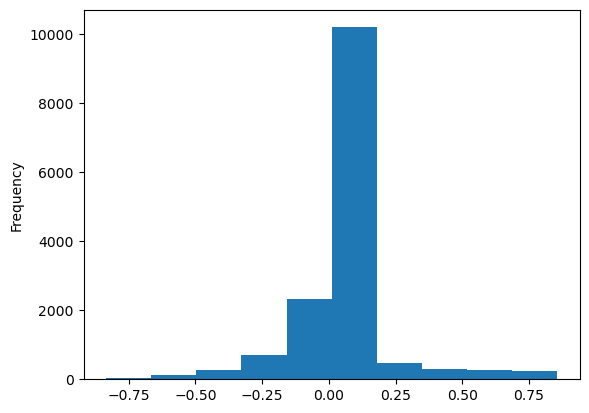

In [16]:
mir_bg.am_p1_given2.plot(kind='hist')

<Axes: ylabel='Frequency'>

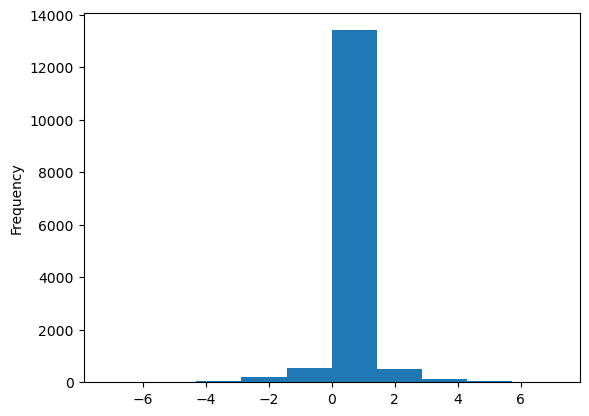

In [17]:
mir_bg.conservative_log_ratio.plot(kind='hist')

In [18]:
mir_bg_top.groupby('adv').plot()

/tmp/ipykernel_2122168/798713192.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mir_bgm.groupby('adv').plot()
/home/arh234/.conda/envs/dev-sanpi/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


KeyboardInterrupt: 

### Set Difference Bigram Associations

In [6]:
set_bg, set_bg_top = show_data(paths['set_bg'])

**Top 30 associations**
_by `am_p1_given2` > `conservative_log_ratio` > `adv_total` > `adj_total`_

|    | l1      | l2                          |   f |   am_odds_ratio_disc |   am_p1_given2 |   am_p2_given1 |   log_ratio |   conservative_log_ratio |   unexpected_ratio |   joint_probability | adv         | adj             |   adv_total |   adj_total |
|---:|:--------|:----------------------------|----:|---------------------:|---------------:|---------------:|------------:|-------------------------:|-------------------:|--------------------:|:------------|:----------------|------------:|------------:|
|  0 | NEGATED | exactly_shy                 | 124 |                3.801 |          0.962 |          0.000 |      21.588 |                    7.201 |              0.962 |               0.000 | exactly     | shy             |  59,426.000 |  50,705.000 |
|  1 | NEGATED | exactly_forthcoming         | 107 |                3.738 |          0.962 |          0.000 |      21.375 |               

**Top 30 associations**
_by `am_p1_given2` > `conservative_log_ratio` > `adv_total` > `adj_total`_

|    | l1      | l2                          |       f |   am_odds_ratio_disc |   am_p1_given2 |   am_p2_given1 |   log_ratio |   conservative_log_ratio |   unexpected_ratio |   joint_probability | adv         | adj             |   adv_total |   adj_total |
|---:|:--------|:----------------------------|--------:|---------------------:|---------------:|---------------:|------------:|-------------------------:|-------------------:|--------------------:|:------------|:----------------|------------:|------------:|
|  0 | NEGATED | exactly_shy                 | 124.000 |                3.801 |          0.962 |          0.000 |      21.588 |                    7.201 |              0.962 |               0.000 | exactly     | shy             |  59,426.000 |  50,705.000 |
|  1 | NEGATED | exactly_forthcoming         | 107.000 |                3.738 |          0.962 |          0.000 |      21.375 |                    6.969 |              0.962 |               0.000 | exactly     | forthcoming     |  59,426.000 |  11,222.000 |
|  2 | NEGATED | exactly_practical           | 106.000 |                3.734 |          0.962 |          0.000 |      21.362 |                    6.954 |              0.962 |               0.000 | exactly     | practical       |  59,426.000 |  67,013.000 |
|  3 | NEGATED | exactly_impressive          | 100.000 |                3.708 |          0.962 |          0.000 |      21.278 |                    6.862 |              0.962 |               0.000 | exactly     | impressive      |  59,426.000 | 195,248.000 |
|  4 | NEGATED | exactly_straightforward     |  83.000 |                3.628 |          0.962 |          0.000 |      21.009 |                    6.563 |              0.962 |               0.000 | exactly     | straightforward |  59,426.000 |  59,542.000 |
|  5 | NEGATED | exactly_reassuring          |  78.000 |                3.601 |          0.962 |          0.000 |      20.919 |                    6.462 |              0.962 |               0.000 | exactly     | reassuring      |  59,426.000 |   8,768.000 |
|  6 | NEGATED | exactly_intuitive           |  76.000 |                3.590 |          0.962 |          0.000 |      20.882 |                    6.419 |              0.962 |               0.000 | exactly     | intuitive       |  59,426.000 |  23,265.000 |
|  7 | NEGATED | exactly_novel               |  66.000 |                3.529 |          0.962 |          0.000 |      20.678 |                    6.186 |              0.962 |               0.000 | exactly     | novel           |  59,426.000 |   8,056.000 |
|  8 | NEGATED | exactly_unheard             |  65.000 |                3.523 |          0.962 |          0.000 |      20.656 |                    6.161 |              0.962 |               0.000 | exactly     | unheard         |  59,426.000 |  17,809.000 |
|  9 | NEGATED | exactly_romantic            |  64.000 |                3.516 |          0.962 |          0.000 |      20.634 |                    6.135 |              0.962 |               0.000 | exactly     | romantic        |  59,426.000 |  33,311.000 |
| 10 | NEGATED | that_thrilled               |  59.000 |                3.481 |          0.962 |          0.000 |      20.517 |                    5.997 |              0.962 |               0.000 | that        | thrilled        | 249,255.016 |  29,212.000 |
| 11 | NEGATED | exactly_kind                |  52.000 |                3.426 |          0.962 |          0.000 |      20.334 |                    5.781 |              0.962 |               0.000 | exactly     | kind            |  59,426.000 |  30,230.000 |
| 12 | NEGATED | exactly_obvious             |  50.000 |                3.410 |          0.962 |          0.000 |      20.278 |                    5.712 |              0.962 |               0.000 | exactly     | obvious         |  59,426.000 | 192,364.000 |
| 13 | NEGATED | exactly_worried             |  47.000 |                3.383 |          0.962 |          0.000 |      20.189 |                    5.604 |              0.962 |               0.000 | exactly     | worried         |  59,426.000 | 118,127.000 |
| 14 | NEGATED | exactly_inexpensive         |  46.000 |                3.374 |          0.962 |          0.000 |      20.158 |                    5.566 |              0.962 |               0.000 | exactly     | inexpensive     |  59,426.000 |  27,873.000 |
| 15 | NEGATED | only_yummy                  |  44.000 |                3.355 |          0.962 |          0.000 |      20.093 |                    5.486 |              0.962 |               0.000 | only        | yummy           | 445,868.000 |   9,013.000 |
| 16 | NEGATED | yet_privy                   |  38.000 |                3.292 |          0.962 |          0.000 |      19.882 |                    5.220 |              0.962 |               0.000 | yet         | privy           |  96,968.000 |   4,150.000 |
| 17 | NEGATED | exactly_supportive          |  37.000 |                3.280 |          0.962 |          0.000 |      19.843 |                    5.170 |              0.962 |               0.000 | exactly     | supportive      |  59,426.000 |  62,714.000 |
| 18 | NEGATED | exactly_unprecedented       |  37.000 |                3.280 |          0.962 |          0.000 |      19.843 |                    5.170 |              0.962 |               0.000 | exactly     | unprecedented   |  59,426.000 |  11,998.000 |
| 19 | NEGATED | exactly_user-friendly       |  36.000 |                3.269 |          0.962 |          0.000 |      19.804 |                    5.119 |              0.962 |               0.000 | exactly     | user-friendly   |  59,426.000 |  10,405.000 |
| 21 | NEGATED | exactly_alone               |  35.000 |                3.257 |          0.962 |          0.000 |      19.763 |                    5.066 |              0.962 |               0.000 | exactly     | alone           |  59,426.000 |  82,780.000 |
| 20 | NEGATED | exactly_transparent         |  35.000 |                3.257 |          0.962 |          0.000 |      19.763 |                    5.066 |              0.962 |               0.000 | exactly     | transparent     |  59,426.000 |  46,080.000 |
| 23 | NEGATED | necessarily_interchangeable |  34.000 |                3.244 |          0.962 |          0.000 |      19.721 |                    5.011 |              0.962 |               0.000 | necessarily | interchangeable |  54,048.000 |   4,990.000 |
| 22 | NEGATED | necessarily_transferable    |  34.000 |                3.244 |          0.962 |          0.000 |      19.721 |                    5.011 |              0.962 |               0.000 | necessarily | transferable    |  54,048.000 |   4,127.000 |
| 25 | NEGATED | only_captivating            |  33.000 |                3.231 |          0.962 |          0.000 |      19.678 |                    4.954 |              0.962 |               0.000 | only        | captivating     | 445,868.000 |  10,506.000 |
| 24 | NEGATED | only_appalling              |  33.000 |                3.231 |          0.962 |          0.000 |      19.678 |                    4.954 |              0.962 |               0.000 | only        | appalling       | 445,868.000 |   7,004.000 |
| 27 | NEGATED | exactly_illegal             |  32.000 |                3.218 |          0.962 |          0.000 |      19.634 |                    4.895 |              0.962 |               0.000 | exactly     | illegal         |  59,426.000 |  43,798.000 |
| 26 | NEGATED | exactly_fashionable         |  32.000 |                3.218 |          0.962 |          0.000 |      19.634 |                    4.895 |              0.962 |               0.000 | exactly     | fashionable     |  59,426.000 |  16,514.000 |
| 30 | NEGATED | exactly_dominant            |  31.000 |                3.205 |          0.962 |          0.000 |      19.588 |                    4.833 |              0.962 |               0.000 | exactly     | dominant        |  59,426.000 |  37,653.000 |
| 28 | NEGATED | exactly_plentiful           |  31.000 |                3.205 |          0.962 |          0.000 |      19.588 |                    4.833 |              0.962 |               0.000 | exactly     | plentiful       |  59,426.000 |   9,509.000 |

## Strongest `ADV`-Polarity Associations 

### Mirror Dataset `ADV` Associations

In [7]:
mir_adv_top = show_data(paths['mir_adv'])

**Top 30 associations**
_by `am_p1_given2` > `conservative_log_ratio`_

| key               | l1       | l2            |    f |   am_odds_ratio_disc |   am_p1_given2 |   am_p2_given1 |   log_ratio |   conservative_log_ratio |
|:------------------|:---------|:--------------|-----:|---------------------:|---------------:|---------------:|------------:|-------------------------:|
| NEG-anywhere      | NEGATIVE | anywhere      |   36 |                1.787 |          0.778 |          0.000 |       6.138 |                    2.842 |
| NEG-ever          | NEGATIVE | ever          | 4613 |                1.799 |          0.770 |          0.016 |       5.953 |                    5.607 |
| NEG-this          | NEGATIVE | this          |   28 |                1.246 |          0.611 |          0.000 |       4.191 |                    1.637 |
| NEG-exactly       | NEGATIVE | exactly       |  787 |                1.200 |          0.584 |          0.003 |       3.984 |                    3.504 |
| NE

**Top 30 associations**
_by `am_p1_given2` > `conservative_log_ratio`_

| key               | l1       | l2            |         f |   am_odds_ratio_disc |   am_p1_given2 |   am_p2_given1 |   log_ratio |   conservative_log_ratio |
|:------------------|:---------|:--------------|----------:|---------------------:|---------------:|---------------:|------------:|-------------------------:|
| NEG-anywhere      | NEGATIVE | anywhere      |    36.000 |                1.787 |          0.778 |          0.000 |       6.138 |                    2.842 |
| NEG-ever          | NEGATIVE | ever          | 4,613.000 |                1.799 |          0.770 |          0.016 |       5.953 |                    5.607 |
| NEG-this          | NEGATIVE | this          |    28.000 |                1.246 |          0.611 |          0.000 |       4.191 |                    1.637 |
| NEG-exactly       | NEGATIVE | exactly       |   787.000 |                1.200 |          0.584 |          0.003 |       3.984 |                    3.504 |
| NEG-any           | NEGATIVE | any           | 1,068.000 |                1.168 |          0.569 |          0.003 |       3.876 |                    3.474 |
| NEG-remotely      | NEGATIVE | remotely      | 1,758.000 |                1.086 |          0.529 |          0.006 |       3.600 |                    3.305 |
| NEG-particularly  | NEGATIVE | particularly  | 9,079.000 |                0.996 |          0.479 |          0.029 |       3.268 |                    3.147 |
| NEG-anymore       | NEGATIVE | anymore       |    16.000 |                0.965 |          0.470 |          0.000 |       3.231 |                    0.253 |
| NEG-that          | NEGATIVE | that          | 4,318.000 |                0.915 |          0.436 |          0.013 |       3.021 |                    2.854 |
| NEG-necessarily   | NEGATIVE | necessarily   |   936.000 |                0.908 |          0.434 |          0.003 |       3.012 |                    2.654 |
| NEG-inherently    | NEGATIVE | inherently    | 2,814.000 |                0.798 |          0.370 |          0.008 |       2.638 |                    2.445 |
| NEG-precisely     | NEGATIVE | precisely     |    48.000 |                0.734 |          0.334 |          0.000 |       2.438 |                    0.948 |
| NEG-again         | NEGATIVE | again         |   171.000 |                0.732 |          0.333 |          0.000 |       2.432 |                    1.664 |
| NEG-overtly       | NEGATIVE | overtly       |   370.000 |                0.672 |          0.299 |          0.001 |       2.230 |                    1.726 |
| NEG-intrinsically | NEGATIVE | intrinsically |   419.000 |                0.669 |          0.297 |          0.001 |       2.220 |                    1.748 |
| NEG-majorly       | NEGATIVE | majorly       |    48.000 |                0.594 |          0.254 |          0.000 |       1.968 |                    0.554 |
| NEG-specially     | NEGATIVE | specially     |    28.000 |                0.585 |          0.249 |          0.000 |       1.934 |                    0.037 |
| NEG-outwardly     | NEGATIVE | outwardly     |    63.000 |                0.574 |          0.243 |          0.000 |       1.901 |                    0.687 |
| NEG-knowingly     | NEGATIVE | knowingly     |    30.000 |                0.550 |          0.229 |          0.000 |       1.816 |                    0.009 |
| NEG-yet           | NEGATIVE | yet           |   313.000 |                0.531 |          0.221 |          0.001 |       1.761 |                    1.244 |
| NEG-alone         | NEGATIVE | alone         |    16.000 |                0.531 |          0.218 |          0.000 |       1.746 |                    0.000 |
| NEG-especially    | NEGATIVE | especially    | 1,542.000 |                0.517 |          0.213 |          0.004 |       1.710 |                    1.482 |
| NEG-enough        | NEGATIVE | enough        |    34.000 |                0.471 |          0.188 |          0.000 |       1.553 |                    0.000 |
| NEG-definitively  | NEGATIVE | definitively  |    15.000 |                0.475 |          0.188 |          0.000 |       1.553 |                    0.000 |
| NEG-solely        | NEGATIVE | solely        |    73.000 |                0.466 |          0.186 |          0.000 |       1.544 |                    0.459 |
| NEG-specifically  | NEGATIVE | specifically  |   132.000 |                0.462 |          0.184 |          0.000 |       1.532 |                    0.741 |
| NEG-offensively   | NEGATIVE | offensively   |    27.000 |                0.464 |          0.184 |          0.000 |       1.527 |                    0.000 |
| NEG-fully         | NEGATIVE | fully         | 1,568.000 |                0.457 |          0.182 |          0.004 |       1.512 |                    1.290 |
| NEG-statistically | NEGATIVE | statistically |   135.000 |                0.454 |          0.181 |          0.000 |       1.506 |                    0.726 |
| NEG-substantively | NEGATIVE | substantively |    16.000 |                0.461 |          0.181 |          0.000 |       1.509 |                    0.000 |


### Set Difference Dataset `ADV` Associations

In [8]:
set_adv_top = show_data(paths['set_adv'])

**Top 30 associations**
_by `am_p1_given2` > `conservative_log_ratio`_

|    | l1      | l2            |      f |   am_odds_ratio_disc |   am_p1_given2 |   am_p2_given1 |   log_ratio |   conservative_log_ratio |   unexpected_ratio |   joint_probability |
|---:|:--------|:--------------|-------:|---------------------:|---------------:|---------------:|------------:|-------------------------:|-------------------:|--------------------:|
|  0 | NEGATED | necessarily   |  41009 |                1.909 |          0.721 |          0.013 |       6.323 |                    6.251 |              0.950 |               0.009 |
|  1 | NEGATED | exactly       |  41973 |                1.793 |          0.669 |          0.013 |       5.936 |                    5.871 |              0.946 |               0.009 |
|  2 | NEGATED | that          | 165061 |                1.721 |          0.626 |          0.051 |       5.641 |                    5.611 |              0.943 |               0.032 |
|  3 | NEGATE

**Top 30 associations**
_by `am_p1_given2` > `conservative_log_ratio`_

|    | l1      | l2            |           f |   am_odds_ratio_disc |   am_p1_given2 |   am_p2_given1 |   log_ratio |   conservative_log_ratio |   unexpected_ratio |   joint_probability |
|---:|:--------|:--------------|------------:|---------------------:|---------------:|---------------:|------------:|-------------------------:|-------------------:|--------------------:|
|  0 | NEGATED | necessarily   |  41,009.000 |                1.909 |          0.721 |          0.013 |       6.323 |                    6.251 |              0.950 |               0.009 |
|  1 | NEGATED | exactly       |  41,973.000 |                1.793 |          0.669 |          0.013 |       5.936 |                    5.871 |              0.946 |               0.009 |
|  2 | NEGATED | that          | 165,061.000 |                1.721 |          0.626 |          0.051 |       5.641 |                    5.611 |              0.943 |               0.032 |
|  3 | NEGATED | immediately   |  57,132.000 |                1.527 |          0.528 |          0.018 |       5.046 |                    5.000 |              0.933 |               0.009 |
|  4 | NEGATED | yet           |  51,866.000 |                1.473 |          0.498 |          0.016 |       4.871 |                    4.825 |              0.929 |               0.008 |
|  5 | NEGATED | terribly      |  17,854.000 |                0.958 |          0.224 |          0.005 |       3.177 |                    3.113 |              0.856 |               0.001 |
|  6 | NEGATED | remotely      |   5,504.000 |                0.946 |          0.219 |          0.002 |       3.140 |                    3.026 |              0.853 |               0.000 |
|  7 | NEGATED | only          | 109,955.000 |                0.934 |          0.210 |          0.031 |       3.059 |                    3.034 |              0.847 |               0.006 |
|  8 | NEGATED | altogether    |   4,413.000 |                0.869 |          0.187 |          0.001 |       2.884 |                    2.759 |              0.832 |               0.000 |
|  9 | NEGATED | consciously   |     914.000 |                0.868 |          0.187 |          0.000 |       2.883 |                    2.606 |              0.832 |               0.000 |
| 10 | NEGATED | anymore       |     414.000 |                0.862 |          0.184 |          0.000 |       2.862 |                    2.446 |              0.830 |               0.000 |
| 11 | NEGATED | entirely      |  62,400.000 |                0.848 |          0.177 |          0.017 |       2.792 |                    2.759 |              0.823 |               0.003 |
| 12 | NEGATED | overly        |  24,028.000 |                0.818 |          0.167 |          0.006 |       2.709 |                    2.657 |              0.815 |               0.001 |
| 13 | NEGATED | precisely     |     764.000 |                0.801 |          0.161 |          0.000 |       2.659 |                    2.360 |              0.810 |               0.000 |
| 14 | NEGATED | anywhere      |     212.000 |                0.761 |          0.147 |          0.000 |       2.524 |                    1.948 |              0.795 |               0.000 |
| 15 | NEGATED | mobile        |     484.000 |                0.749 |          0.143 |          0.000 |       2.485 |                    2.111 |              0.790 |               0.000 |
| 16 | NEGATED | in            |     162.000 |                0.737 |          0.138 |          0.000 |       2.446 |                    1.784 |              0.786 |               0.000 |
| 17 | NEGATED | appreciably   |     232.000 |                0.722 |          0.134 |          0.000 |       2.396 |                    1.850 |              0.779 |               0.000 |
| 18 | NEGATED | merely        |   5,320.000 |                0.711 |          0.130 |          0.001 |       2.361 |                    2.251 |              0.775 |               0.000 |
| 19 | NEGATED | any           |  15,342.000 |                0.700 |          0.126 |          0.004 |       2.320 |                    2.256 |              0.769 |               0.000 |
| 20 | NEGATED | always        | 103,441.000 |                0.703 |          0.125 |          0.026 |       2.297 |                    2.273 |              0.766 |               0.003 |
| 21 | NEGATED | unduly        |     899.000 |                0.692 |          0.124 |          0.000 |       2.297 |                    2.027 |              0.766 |               0.000 |
| 22 | NEGATED | outright      |   1,189.000 |                0.676 |          0.119 |          0.000 |       2.245 |                    2.012 |              0.759 |               0.000 |
| 23 | NEGATED | directly      |   8,065.000 |                0.662 |          0.115 |          0.002 |       2.197 |                    2.109 |              0.752 |               0.000 |
| 24 | NEGATED | lawfully      |     145.000 |                0.652 |          0.112 |          0.000 |       2.162 |                    1.469 |              0.747 |               0.000 |
| 25 | NEGATED | as            | 526,827.000 |                0.687 |          0.109 |          0.128 |       2.075 |                    2.064 |              0.734 |               0.014 |
| 26 | NEGATED | overtly       |   2,037.000 |                0.642 |          0.109 |          0.000 |       2.131 |                    1.955 |              0.743 |               0.000 |
| 27 | NEGATED | adequately    |     308.000 |                0.617 |          0.102 |          0.000 |       2.048 |                    1.585 |              0.730 |               0.000 |
| 28 | NEGATED | automatically |     775.000 |                0.607 |          0.099 |          0.000 |       2.014 |                    1.727 |              0.724 |               0.000 |
| 29 | NEGATED | mutually      |   5,928.000 |                0.593 |          0.095 |          0.001 |       1.968 |                    1.866 |              0.716 |               0.000 |
